In [2]:
import pandas as pd
import numpy as np
import os
import csv
import random
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('bank.csv')

In [4]:
# prepare the data for the model using supervised learning: the dataset is split in two parts, the evidences and the training label (Personal Loan)

# evidence: Age, Experience, Income, Family, CCVAverage, Education, Mortgage, Securities Account, CD Account, Online, CreditCard
# label: Personal Loan

data = []

# columns 1 to 11 are the evidences (Age, Experience, Income, Family, CCVAverage, Education, Mortgage, Securities Account, CD Account, Online, CreditCard)
# column 12 is the label for supervised learning models (Personal Loan)

for row in df.values:
    data.append({'evidence': [float(cell) for cell in row[1:12]], 'label': row[12]})


In [5]:
TRAINING_SET_SIZE = 0.6

# separate input data into training and testing sets

training_data_size = int(TRAINING_SET_SIZE * len(data))

# mix input data randomly

random.shuffle(data)

# training and testing data sets

training = data[:training_data_size]
testing = data[training_data_size:]

x_training = [row['evidence'] for row in training]
y_training = [row['label'] for row in training]

# make predictions using the testing set

x_testing = [row['evidence'] for row in testing]
y_testing = [row['label'] for row in testing]

In [6]:
len(x_training), len(x_testing)

(3000, 2000)

In [7]:

# Gaussian Naive Bayes

classifier = GaussianNB()
classifier.fit(x_training, y_training)

predictions = classifier.predict(x_testing)

# evaluate the model performance

correct_predictions = (y_testing == predictions).sum()
incorrect_predictions = (y_testing != predictions).sum()
total_predictions = len(predictions)

# prediction performance

print ('Gaussian Naive Bayes \n')

print ('Correct   ', correct_predictions)
print ('Incorrect ', incorrect_predictions)
print ('Accuracy  ', (100 * correct_predictions / total_predictions))


Gaussian Naive Bayes 

Correct    1754
Incorrect  246
Accuracy   87.7


Evaluation of K-Nearest Neighbors 

k = 1  90.400
k = 2  91.300
k = 3  91.100
k = 4  91.600
k = 5  91.550
k = 6  91.250
k = 7  91.050
k = 8  91.300
k = 9  91.100
k = 10  91.050

Best neighbor k = 4  91.600 



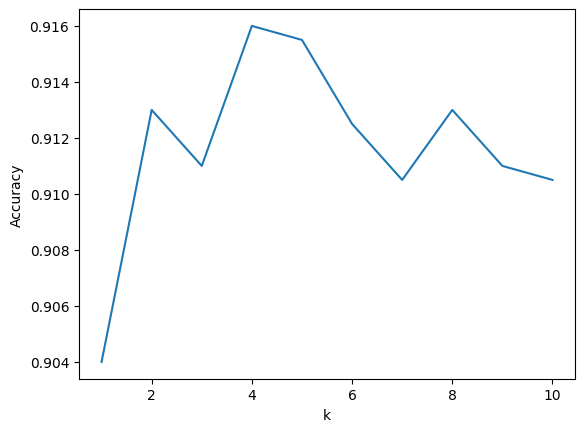

Incorrect  246
Accuracy   87.7


In [8]:
# evaluate K-Nearest Neighbor for k = 1 to 10

MAX_NEIGHBORS = 10

scores = []

best_score = 0
best_neighbor = 0

print ('Evaluation of K-Nearest Neighbors \n')

for k in range(1, MAX_NEIGHBORS + 1):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_training, y_training)

    scores.append(classifier.score(x_testing, y_testing))

    if best_score < scores[k-1]:
        best_neighbor = k-1
        best_score = scores[k-1]

    print ('k =', k, ' {:.3f}'.format(100*scores[k-1]))

print ('\nBest neighbor k =', (best_neighbor+1), ' {:.3f}'.format(100*scores[best_neighbor]), '\n')

plt.plot(range(1, MAX_NEIGHBORS + 1), scores)
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.show()

print ('Incorrect ', incorrect_predictions)
print ('Accuracy  ', (100 * correct_predictions / total_predictions))

In [9]:
# k-Neighbors

NEIGHBORS = 4

classifier = KNeighborsClassifier(n_neighbors=NEIGHBORS)
classifier.fit(x_training, y_training)

predictions = classifier.predict(x_testing)

# evaluate the model performance

correct_predictions = (y_testing == predictions).sum()
incorrect_predictions = (y_testing != predictions).sum()
total_predictions = len(predictions)

# prediction performance

print ('k-Neighbors(2) \n')

print ('Correct   ', correct_predictions)
print ('Incorrect ', incorrect_predictions)
print ('Accuracy  ', (100 * correct_predictions / total_predictions))

k-Neighbors(2) 

Correct    1832
Incorrect  168
Accuracy   91.6


In [10]:
# logistic regresion

classifier = LogisticRegression(solver='liblinear')
classifier.fit(x_training, y_training)

predictions = classifier.predict(x_testing)

# evaluate the model performance

correct_predictions = (y_testing == predictions).sum()
incorrect_predictions = (y_testing != predictions).sum()
total_predictions = len(predictions)

# prediction performance

print ('logistic regression \n')

print ('Correct   ', correct_predictions)
print ('Incorrect ', incorrect_predictions)
print ('Accuracy  ', (100 * correct_predictions / total_predictions))

logistic regression 

Correct    1894
Incorrect  106
Accuracy   94.7


In [ ]:
# test the model with unseen data: customer likely to get a personal loan: Age, Experience, Income, Family, CCVAverage, Education, Mortgage, Securities Account, CD Account, Online, CreditCard

unseen_data = [[38.0, 14.0, 140.0, 4.0, 4.7, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0],
               [23.0,  1.0,  55.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],
               [50.0, 24.0, 160.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0],
               [21.0,  1.0,  40.0, 1.0, 0.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [45.0, 20.0, 120.0, 5.0, 2.5, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0],
               [24.0,  2.0,  60.0, 1.0, 1.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

for data in unseen_data:
    prediction = classifier.predict(np.asarray(data).reshape(1,-1))

    if (prediction[0] == 0):
        print("The customer is not likely to get a personal loan")
    else:
        print("The customer is likely to get a personal loan")

# model seams highly reliant on education, and in contrest, gives little weight to other inputs.

The customer is likely to get a personal loan
The customer is not likely to get a personal loan
The customer is likely to get a personal loan
The customer is not likely to get a personal loan
The customer is likely to get a personal loan
The customer is not likely to get a personal loan
